# Step 1: Load the data

In Python we use a package called "Pandas" ([website](http://pandas.pydata.org/)). Pandas is to Python what PHStat is to Excel.

In [1]:
import pandas as pd

Read the whole Excel file into a variable called "df" (short for "data frame"):

In [2]:
df = pd.read_excel( 'BMW STUDENT DATA Fall 2016.xlsx', index_col=0 )

# Step 2: View the data

In [3]:
df

,Model 330 = 1,Age,Mileage,Price ($),Style,Transmission,Color
CAR NO.,,,,,,,
1,0,2,34389,34995,Convertible,Automatic,Silver/Gray Metallic
2,0,1,4443,31995,Not convertible,Automatic,Silver/Gray Metallic
3,0,4,39856,25995,Not convertible,Automatic,Blue Metallic
4,0,5,58551,21995,Not convertible,Manual,Blue Metallic
5,0,4,26312,25995,Not convertible,Automatic,Blue Metallic
6,0,2,24463,24995,Not convertible,Automatic,Silver/Gray Metallic
7,0,4,57588,26995,Not convertible,Automatic,Silver/Gray Metallic
8,0,4,38595,28995,Not convertible,Automatic,Black Metallic/Jet
9,1,3,55786,27995,Not convertible,Automatic,Black Metallic/Jet


# Step 3: Make the column headers nicer

Change the name of the column from "Model 330 = 1" to just plain "Model" and take the dollar sign out of the "Price" header: 

In [4]:
new_column_headers = list( df.columns )
new_column_headers[0] = 'Model'
new_column_headers[3] = 'Price'
df.columns = new_column_headers

Did it work? Print out the top 5 rows to check the new column names:

In [5]:
df.head()

,Model,Age,Mileage,Price,Style,Transmission,Color
CAR NO.,,,,,,,
1,0,2,34389,34995,Convertible,Automatic,Silver/Gray Metallic
2,0,1,4443,31995,Not convertible,Automatic,Silver/Gray Metallic
3,0,4,39856,25995,Not convertible,Automatic,Blue Metallic
4,0,5,58551,21995,Not convertible,Manual,Blue Metallic
5,0,4,26312,25995,Not convertible,Automatic,Blue Metallic


# Step 4: Some simple statistics

## Do some value counts for the columns

In [6]:
df['Model'].value_counts()

0    131
1     71
Name: Model, dtype: int64

In [7]:
df['Color'].value_counts()

Silver/Gray Metallic    100
Blue Metallic            40
Black Metallic/Jet       37
Alpine White             15
Electric Red             10
Name: Color, dtype: int64

Instant correlation table:

In [8]:
df.corr()

,Model,Age,Mileage,Price
Model,1.000000,0.056835,-0.000587,0.356442
Age,0.056835,1.000000,0.651562,-0.589769
Mileage,-0.000587,0.651562,1.000000,-0.611877
Price,0.356442,-0.589769,-0.611877,1.000000


# Step 3: Make Figures

## Figure 1: Histogram

We'll import the statistics package "Seaborn" and set some defaults:

In [9]:
%matplotlib inline
import seaborn
seaborn.set()

Now we'll do a histogram of the Price variable, which Seaborn calls a "distplot"

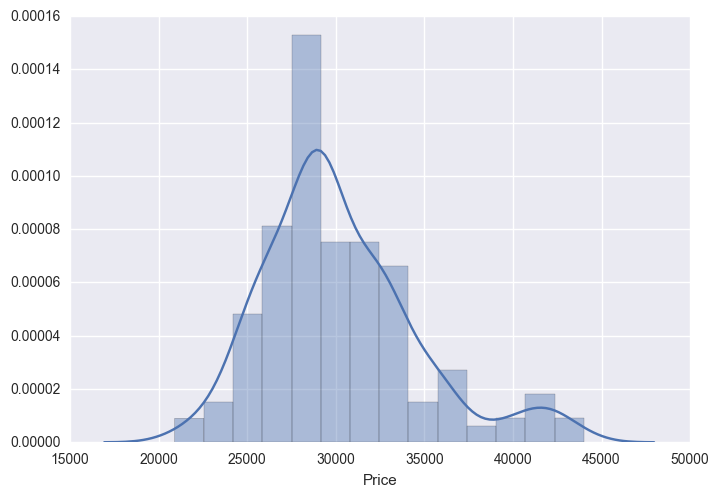

In [10]:
seaborn.distplot( df['Price'] )

## Figure 2: boxplot

First we choose some colors for our figure that match those in the "Color" column:

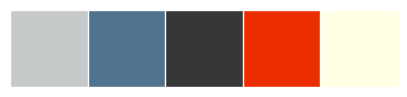

In [11]:
color_names = [ 'silver', 'metallic blue', 'dark grey', 'tomato red', 'off white' ]
color_pallette = seaborn.color_palette( [ seaborn.xkcd_rgb[ _ ] for _ in color_names ] )
seaborn.palplot(color_pallette)

Now we change the style of the figure to a "white grid" background:

In [12]:
seaborn.set_style("whitegrid")

Finally, plot away:

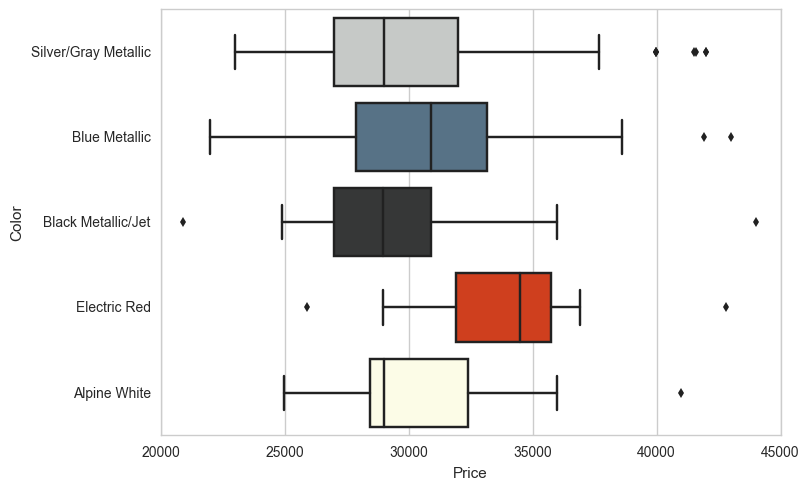

In [14]:
seaborn.boxplot(y="Color", x="Price", data=df, palette=color_pallette )

# Multiple regression

In [15]:
import statsmodels.formula.api as smf

You tell Python what to regress by writing a sentence using the tilde ("~") and plus characters:

In [16]:
model = smf.ols('Price ~ Age + Mileage + Style + Model + Transmission', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     106.2
Date:                Tue, 13 Dec 2016   Prob (F-statistic):           7.48e-54
Time:                        13:28:14   Log-Likelihood:                -1847.4
No. Observations:                 202   AIC:                             3707.
Df Residuals:                     196   BIC:                             3727.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                 4.288e+04    706.273     60.708      0.000      4.15e+04  4.43e+04
Style[T.Not convertible] -6757.8748    655.656    -10.307      0.000     -8050.922 -5464.828
Transmission[T.Manual]    -648.4767    428.476     -1.513      0.132     -1493.492   196.539
Age                      -1187.1724    210.426     -5.642      0.000     -1602.162  -772.183
Mileage                     -0.1111      0.017     -6.349      0.000        -0.146    -0.077
Model                     3308.3346    340.649      9.712      0.000      2636.526  3980.143
==============================================================================
Omnibus:                       25.118   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.233
Skew:                           0.422   Prob(JB):                     3.78e-18
Kurtosis:                       5.970   Cond. No.                     1.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Tell Python to round to the nearest dollar:
pd.set_option('precision', 0)

Show me the predicted values and the residuals for each car along with the rest of the dataset:

In [18]:
pd.concat( ( df, results.fittedvalues.to_frame( "Predicted" ), results.resid.to_frame( "Residual" ) ), axis=1 )

,Model,Age,Mileage,Price,Style,Transmission,Color,Predicted,Residual
CAR NO.,,,,,,,,,
1,0,2,34389,34995,Convertible,Automatic,Silver/Gray Metallic,36683,-1688
2,0,1,4443,31995,Not convertible,Automatic,Silver/Gray Metallic,34438,-2443
3,0,4,39856,25995,Not convertible,Automatic,Blue Metallic,26943,-948
4,0,5,58551,21995,Not convertible,Manual,Blue Metallic,23032,-1037
5,0,4,26312,25995,Not convertible,Automatic,Blue Metallic,28448,-2453
6,0,2,24463,24995,Not convertible,Automatic,Silver/Gray Metallic,31027,-6032
7,0,4,57588,26995,Not convertible,Automatic,Silver/Gray Metallic,24974,2021
8,0,4,38595,28995,Not convertible,Automatic,Black Metallic/Jet,27083,1912
9,1,3,55786,27995,Not convertible,Automatic,Black Metallic/Jet,29670,-1675


# The End!